In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## 1. 讀入 Fashion MNSIT 數據集

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## 2. 欣賞數據集內容

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


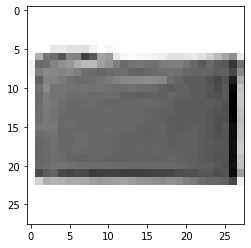

In [5]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

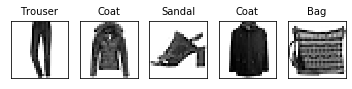

In [6]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')

## 3.資料整理

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train = x_train.reshape(len(x_train),28*28)
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
x_test = x_test.reshape(len(x_test),28*28)
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

reference:https://ithelp.ithome.com.tw/articles/10197084

In [11]:
#由於電腦無法理解非數字類的數據，One-hot編碼可以將類別性數據轉換成統一的數字格式，方便機器學習的演算法進行處理及計算
#使用one-hot進行轉換
from tensorflow.keras.utils import to_categorical

In [12]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## 設計神經網路

In [13]:
#設定模型
from tensorflow.keras.models import Sequential
#設定每一層的長相
from tensorflow.keras.layers import Dense # dense：全連結神經層
from tensorflow.keras.optimizers import SGD # SGD：隨機梯度下降法(最標準的學習方式)

In [14]:
model = Sequential()
#打造函數學習機

In [15]:
model.add(Dense(87,input_dim=784, activation='relu'))
#87個輸入/神經元，維度:784
#activation：激勵函數，主要是利用非線性方程式，解決非線性問題

In [16]:
model.add(Dense(87, activation='relu'))

In [17]:
#輸出
model.add(Dense(10, activation='softmax'))
#softmax:是輸出的每一列的和為1

## 4.組裝神經網路

In [18]:
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])

In [19]:
#神經網路架構
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


## 5.訓練神經網路

In [25]:
#舉例：有一個2000個訓練樣本的資料集。將2000個樣本分成大小為500的batch,那麼完成一個epoch需要4個iteration。
model.fit(x_train, y_train, batch_size=100, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 196us/sample - loss: 0.0184 - accuracy: 0.8766
Epoch 2/50
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0183 - accuracy: 0.8776
Epoch 3/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0182 - accuracy: 0.8778
Epoch 4/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0181 - accuracy: 0.8793
Epoch 5/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0181 - accuracy: 0.8793
Epoch 6/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0180 - accuracy: 0.8795
Epoch 7/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0179 - accuracy: 0.8802
Epoch 8/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0178 - accuracy: 0.8813
Epoch 9/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0177 - accuracy: 0.8820
Epoch 10/50


# 6.訓練成果

In [26]:
from ipywidgets import interact_manual

In [27]:
predict = model.predict_classes(x_test)

In [28]:
def test(n):
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:',class_names[predict[n]])

In [29]:
interact_manual(test,n = (0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.test(n)>